In [18]:
import pandas as pd
import joblib
from pathlib import Path
import os
import sys
import time
notebook_dir = os.path.dirname(os.path.abspath(''))
src_path = os.path.join(notebook_dir, '..\src')
sys.path.append(src_path)
print(src_path)

d:\ANNACONDA\projects\interest_rate_prediction\notebooks\..\src


In [19]:
from config import MODEL_DATA_PATH

In [20]:
df = pd.read_parquet(f"../{MODEL_DATA_PATH}/full_data/full_data.parquet")

# Convert the Year, Month, Day columns into a Datetime index
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set the Date column as the index
df = df.set_index('Date')

# Sort the DataFrame by Date
df = df.sort_index()

In [21]:
df

,Year,Month,Day,Quarter,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,...,"Close_sp500_1_4,768.37","Close_sp500_1_4,769.83","Close_sp500_1_4,774.75","Close_sp500_1_4,781.58","Close_sp500_1_4,783.35","Close_sp500_1_4,906.19","Close_sp500_1_5,018.39","Close_sp500_1_5,137.08","Close_sp500_1_5,243.77",Fed_Fund_rate
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,2002,1,2,Q1,0.231463,0.231557,9.871353e-14,-1.837522e-14,0.184681,0.178370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73
2002-01-03,2002,1,3,Q1,0.225244,0.225453,9.871353e-14,-1.837522e-14,0.178567,0.172418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73
2002-01-04,2002,1,4,Q1,0.219025,0.219350,9.871353e-14,-1.837522e-14,0.172452,0.166466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73
2002-01-07,2002,1,7,Q1,0.212806,0.213246,9.871353e-14,-1.837522e-14,0.154110,0.148610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73
2002-01-08,2002,1,8,Q1,0.206588,0.201039,9.871353e-14,-1.837522e-14,0.147996,0.142658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,2024,1,1,Q1,2.459053,2.466663,9.871353e-14,-1.837522e-14,2.340554,2.352006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.33
2024-02-01,2024,2,1,Q1,2.459053,2.466663,9.871353e-14,-1.837522e-14,2.340554,2.352006,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.33
2024-03-01,2024,3,1,Q1,2.459053,2.466663,9.871353e-14,-1.837522e-14,2.340554,2.352006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.33


In [22]:
future_days_df = pd.read_parquet(f"../{MODEL_DATA_PATH}/future/future_days_df.parquet")
future_weeks_df = pd.read_parquet(f"../{MODEL_DATA_PATH}/future/future_weeks_df.parquet")
future_months_df = pd.read_parquet(f"../{MODEL_DATA_PATH}/future/future_months_df.parquet")

In [29]:
import plotly.graph_objects as go

# Plot the historical data and predictions using Plotly
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(x=df.index, y=df['Fed_Fund_rate'], mode='lines', name='Historical Fed Fund Rate'))

# Add future predictions traces
fig.add_trace(go.Scatter(x=future_days_df.index, y=future_days_df['Predicted_Fed_Fund_rate'], mode='lines', name='Predicted Fed Fund Rate (Days)', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=future_weeks_df.index, y=future_weeks_df['Predicted_Fed_Fund_rate'], mode='lines', name='Predicted Fed Fund Rate (Weeks)', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=future_months_df.index, y=future_months_df['Predicted_Fed_Fund_rate'], mode='lines', name='Predicted Fed Fund Rate (Months)', line=dict(dash='longdash')))

# Customize the plot
fig.update_layout(title='Fed Fund Rate Predictions',
                  xaxis_title='Date',
                  yaxis_title='Fed Fund Rate',
                  legend_title='Legend',
                  template='plotly_white',
                  width=1500,
                  height=800)

# Show the plot
fig.show()

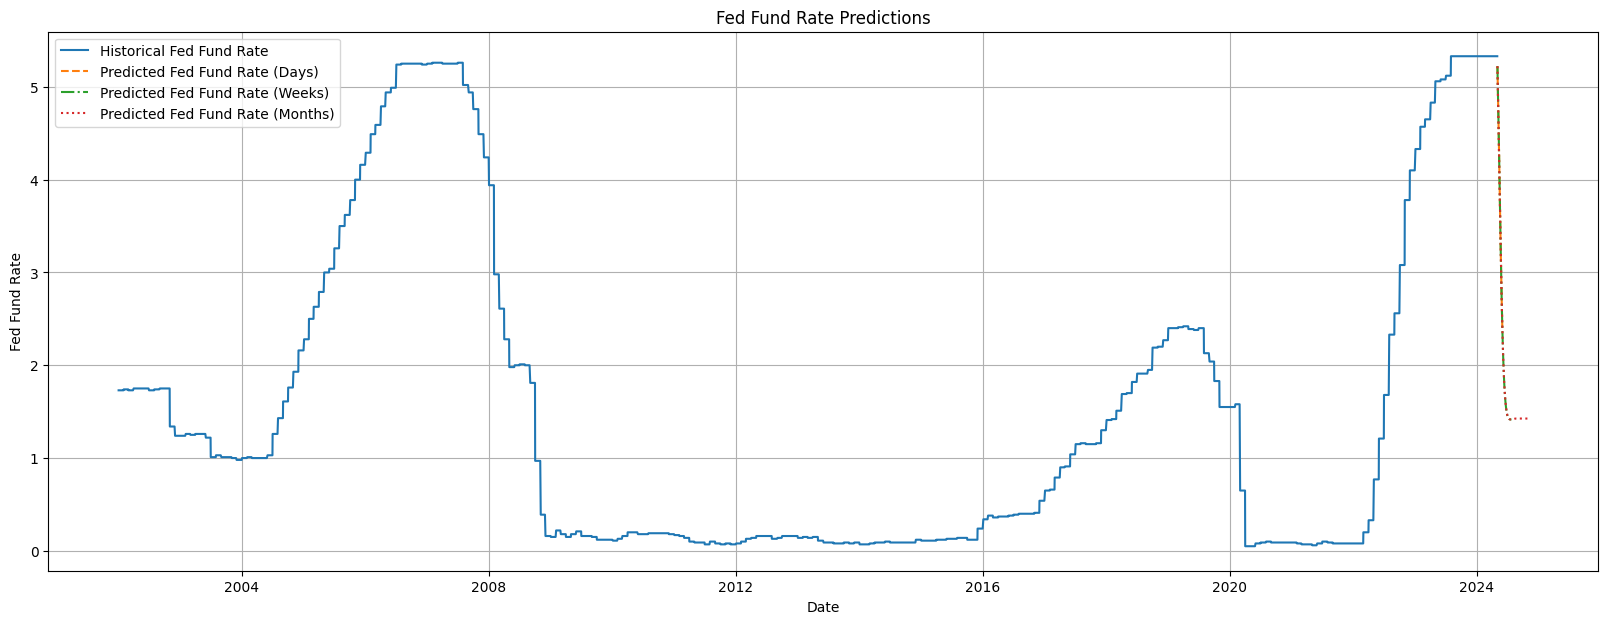

In [ ]:
import matplotlib.pyplot as plt
# Plot the historical data and predictions using Matplotlib
plt.figure(figsize=(20, 7))

# Plot historical data
plt.plot(df.index, df['Fed_Fund_rate'], label='Historical Fed Fund Rate')

# Plot future predictions for days
plt.plot(future_days_df.index, future_days_df['Predicted_Fed_Fund_rate'], label='Predicted Fed Fund Rate (Days)', linestyle='--')

# Plot future predictions for weeks
plt.plot(future_weeks_df.index, future_weeks_df['Predicted_Fed_Fund_rate'], label='Predicted Fed Fund Rate (Weeks)', linestyle='-.')
 
# Plot future predictions for months
plt.plot(future_months_df.index, future_months_df['Predicted_Fed_Fund_rate'], label='Predicted Fed Fund Rate (Months)', linestyle=':')

# Customize the plot
plt.title('Fed Fund Rate Predictions')
plt.xlabel('Date')
plt.ylabel('Fed Fund Rate')
plt.legend()
plt.grid(True)
plt.show()